# Title : Personality Prediction

#  Team Members :

#                        Velmurugan B

#                        Mohanaprasanth G

#                        Kabilash P V

# PROBLEM STATEMENT :

Personality Prediction :

         The Aim is to develop models that can accurately classify or predict an individual's personality traits, such as the Big Five (Openness, Conscientiousness, Extraversion, Agreeableness, Neuroticism), using available information to enhance personalization, recommendations, and psychological understanding. It will classify the Personality as Dependable, Extraverted, Lively, Responsible, Serious


In [1]:
#importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import levene
from scipy.stats import shapiro
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,precision_score,f1_score,recall_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import roc_auc_score

from sklearn.ensemble import RandomForestClassifier



import warnings
warnings.filterwarnings('ignore')

# DATASET :

In [201]:
Personality = pd.read_csv(r"C:\Users\Velmurugan\Desktop\DataScience_Intern\Personalty_Prediction_System\personality_data.csv")
Personality["Total"] = Personality["openness"] + Personality["neuroticism"] + \
Personality["conscientiousness"] + Personality["agreeableness"] + Personality["extraversion"]

data = Personality.copy()

dataV = Personality.copy() # for VISUALIZATION
dataV["gender"] = pd.Categorical(dataV["gender"])
dataV["openness"] = pd.Categorical(dataV["openness"])
dataV["neuroticism"] = pd.Categorical(dataV["neuroticism"])
dataV["conscientiousness"] = pd.Categorical(dataV["conscientiousness"])
dataV["agreeableness"] = pd.Categorical(dataV["agreeableness"])
dataV["extraversion"] = pd.Categorical(dataV["extraversion"])
dataV["Personality"] = pd.Categorical(dataV["Personality"])

df = data.select_dtypes(include=["float64","int64","int32"])

In [202]:
data

,gender,age,openness,neuroticism,conscientiousness,agreeableness,extraversion,Personality,Total
0,Female,20,7,9,9,5,5,dependable,35
1,Male,17,5,4,5,2,4,serious,20
2,Female,25,5,5,7,2,4,serious,23
3,Female,18,6,2,7,4,7,serious,26
4,Female,19,2,4,7,1,3,responsible,17
...,...,...,...,...,...,...,...,...,...
310,Female,19,6,5,6,4,3,extraverted,24
311,Male,18,2,5,8,3,7,dependable,25
312,Male,18,7,5,6,2,7,serious,27
313,Male,23,6,7,5,4,3,extraverted,25


# DATA PREPROCESSING & EDA :

In [203]:
print(data.shape)
print('\n')
print(data.size)

(315, 9)


2835


In [204]:
print(data.columns)

Index(['gender', 'age', 'openness', 'neuroticism', 'conscientiousness',
       'agreeableness', 'extraversion', 'Personality', 'Total'],
      dtype='object')


In [205]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315 entries, 0 to 314
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   gender             315 non-null    object
 1   age                315 non-null    int64 
 2   openness           315 non-null    int64 
 3   neuroticism        315 non-null    int64 
 4   conscientiousness  315 non-null    int64 
 5   agreeableness      315 non-null    int64 
 6   extraversion       315 non-null    int64 
 7   Personality        315 non-null    object
 8   Total              315 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 22.3+ KB
None


In [206]:
print(data.describe().T)

                   count       mean       std   min   25%   50%   75%   max
age                315.0  20.244444  2.616811   5.0  18.0  20.0  22.0  28.0
openness           315.0   4.850794  1.537211   1.0   4.0   5.0   6.0   8.0
neuroticism        315.0   4.584127  1.818623   1.0   3.0   5.0   6.0   9.0
conscientiousness  315.0   4.812698  1.786315   1.0   4.0   5.0   6.0   9.0
agreeableness      315.0   4.844444  1.718555   1.0   4.0   5.0   6.0   8.0
extraversion       315.0   4.926984  1.466527   1.0   4.0   5.0   6.0   8.0
Total              315.0  24.019048  3.417772  16.0  22.0  24.0  26.0  35.0


In [207]:
print(data["gender"].value_counts())
print("----"*30)
print(data["Personality"].value_counts())

gender
Male      159
Female    156
Name: count, dtype: int64
------------------------------------------------------------------------------------------------------------------------
Personality
serious        153
extraverted     77
responsible     40
lively          24
dependable      21
Name: count, dtype: int64


In [208]:
#printing the data set values:
print(data.groupby(["gender","Personality"])["openness"].mean())
print("----"*30)
print(data.groupby(["gender","Personality"])["neuroticism"].mean())
print("----"*30)
print(data.groupby(["gender","Personality"])["conscientiousness"].mean())
print("----"*30)
print(data.groupby(["gender","Personality"])["agreeableness"].mean())
print("----"*30)
print(data.groupby(["gender","Personality"])["extraversion"].mean())
print("----"*30)
print(data.groupby(["Personality","Total"])["openness"].mean())
print("----"*30)
print(data.groupby(["Personality","Total"])["neuroticism"].mean())
print("----"*30)
print(data.groupby(["Personality","Total"])["conscientiousness"].mean())
print("----"*30)
print(data.groupby(["Personality","Total"])["agreeableness"].mean())
print("----"*30)
print(data.groupby(["Personality","Total"])["extraversion"].mean())

gender  Personality
Female  dependable     5.636364
        extraverted    5.000000
        lively         5.500000
        responsible    4.428571
        serious        4.607843
Male    dependable     5.200000
        extraverted    5.578947
        lively         5.500000
        responsible    4.500000
        serious        4.637255
Name: openness, dtype: float64
------------------------------------------------------------------------------------------------------------------------
gender  Personality
Female  dependable     5.454545
        extraverted    5.706897
        lively         2.750000
        responsible    4.214286
        serious        3.901961
Male    dependable     4.900000
        extraverted    6.631579
        lively         3.500000
        responsible    4.333333
        serious        4.225490
Name: neuroticism, dtype: float64
------------------------------------------------------------------------------------------------------------------------
gender  Perso

In [209]:
data.head(10)

,gender,age,openness,neuroticism,conscientiousness,agreeableness,extraversion,Personality,Total
0,Female,20,7,9,9,5,5,dependable,35
1,Male,17,5,4,5,2,4,serious,20
2,Female,25,5,5,7,2,4,serious,23
3,Female,18,6,2,7,4,7,serious,26
4,Female,19,2,4,7,1,3,responsible,17
5,Female,19,6,4,7,5,5,serious,27
6,Female,24,1,2,7,4,6,extraverted,20
7,Male,27,4,5,7,4,4,serious,24
8,Male,20,6,4,5,6,6,serious,27
9,Male,21,5,4,4,6,4,serious,23


In [210]:
data.tail(10)

,gender,age,openness,neuroticism,conscientiousness,agreeableness,extraversion,Personality,Total
305,Female,19,4,5,6,5,5,serious,25
306,Female,17,6,3,6,4,6,serious,25
307,Male,20,1,2,5,8,4,serious,20
308,Male,18,3,3,6,5,5,serious,22
309,Male,22,4,4,7,5,6,serious,26
310,Female,19,6,5,6,4,3,extraverted,24
311,Male,18,2,5,8,3,7,dependable,25
312,Male,18,7,5,6,2,7,serious,27
313,Male,23,6,7,5,4,3,extraverted,25
314,Female,18,5,7,3,5,6,extraverted,26


In [211]:
data.isna()

,gender,age,openness,neuroticism,conscientiousness,agreeableness,extraversion,Personality,Total
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
310,False,False,False,False,False,False,False,False,False
311,False,False,False,False,False,False,False,False,False
312,False,False,False,False,False,False,False,False,False
313,False,False,False,False,False,False,False,False,False


In [212]:
data.isnull().sum()

gender               0
age                  0
openness             0
neuroticism          0
conscientiousness    0
agreeableness        0
extraversion         0
Personality          0
Total                0
dtype: int64

<Axes: >

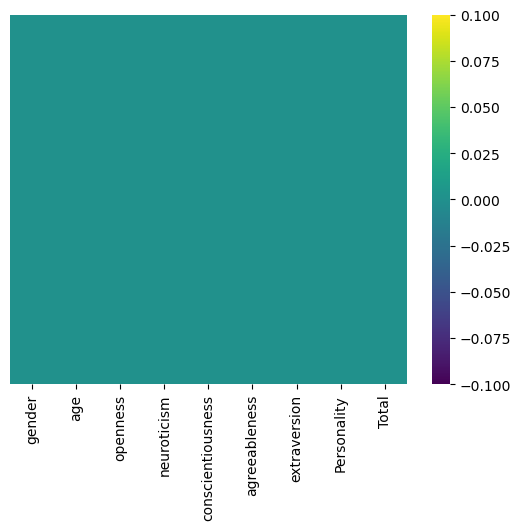

In [213]:
sns.heatmap(data.isnull(), yticklabels=False, cmap="viridis")

# VISULAIZATION :

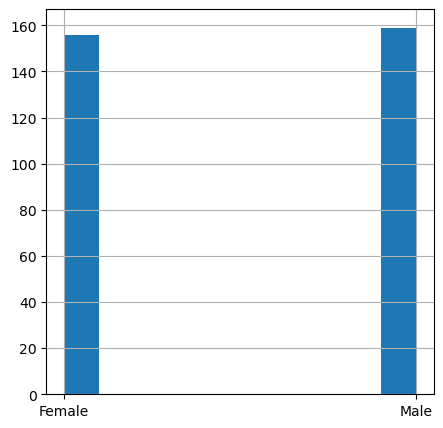

In [214]:
dataV["gender"].hist(figsize=(5,5))
plt.show()

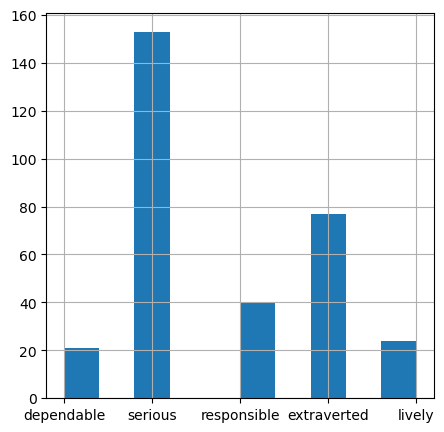

In [215]:
dataV["Personality"].hist(figsize=(5,5))
plt.show()

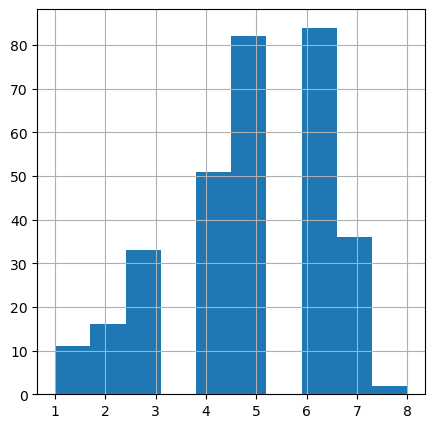

In [216]:
dataV["openness"].hist(figsize=(5,5))
plt.show()

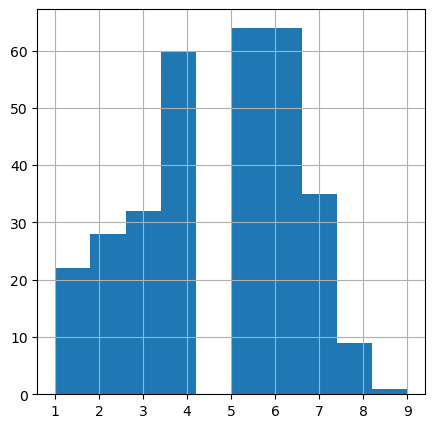

In [217]:
dataV["neuroticism"].hist(figsize=(5,5))
plt.show()

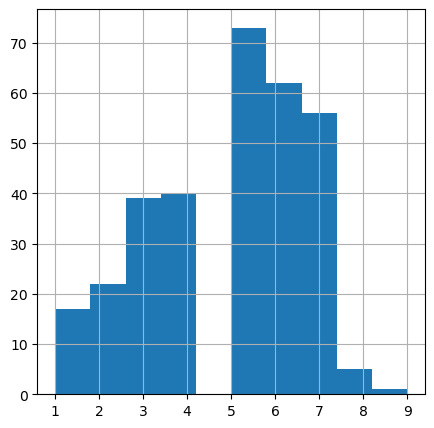

In [218]:
dataV["conscientiousness"].hist(figsize=(5,5))
plt.show()

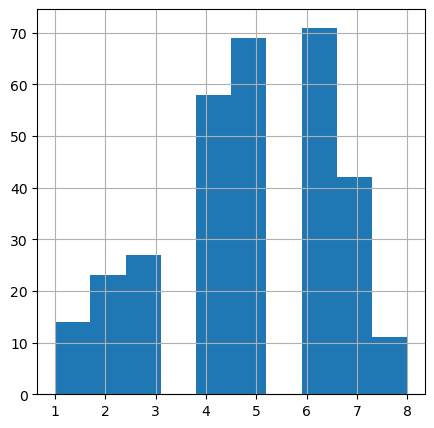

In [219]:
dataV["agreeableness"].hist(figsize=(5,5))
plt.show()

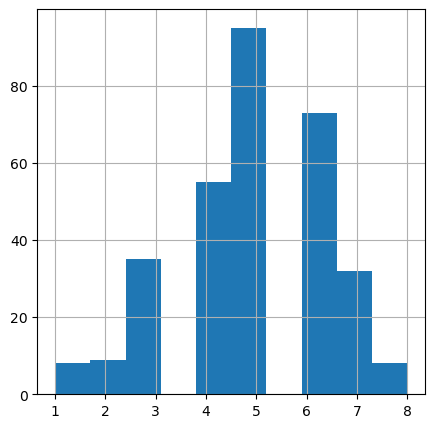

In [220]:
dataV["extraversion"].hist(figsize=(5,5))
plt.show()

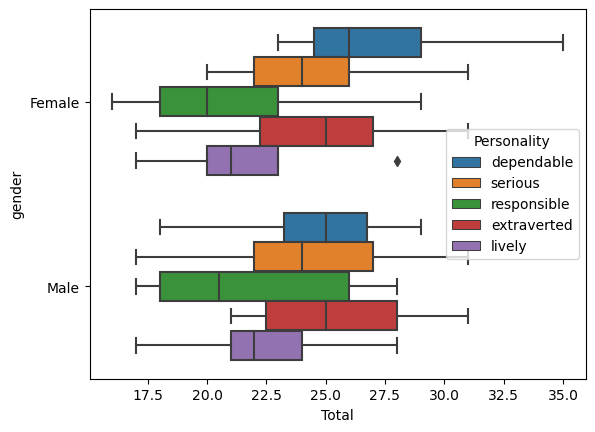

In [221]:
sns.boxplot(x="Total",y="gender",hue="Personality",data=data)
plt.show()

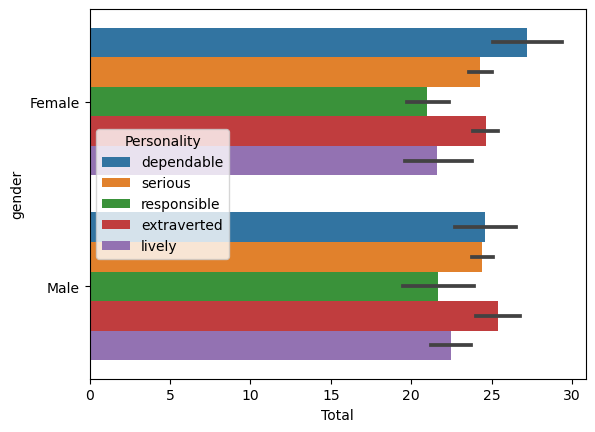

In [222]:
sns.barplot(x="Total",y="gender",hue="Personality",data=data)
plt.show()

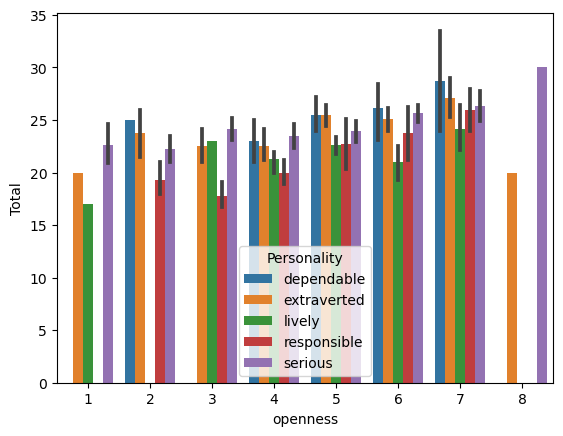

In [223]:
sns.barplot(x="openness",y="Total",hue="Personality",data=dataV)
plt.show()

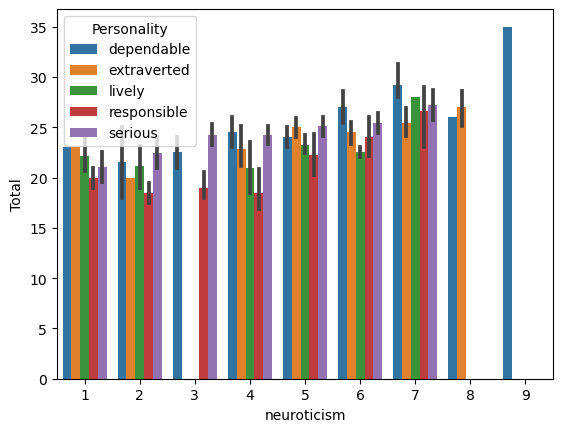

In [224]:
sns.barplot(x="neuroticism",y="Total",hue="Personality",data=dataV)
plt.show()

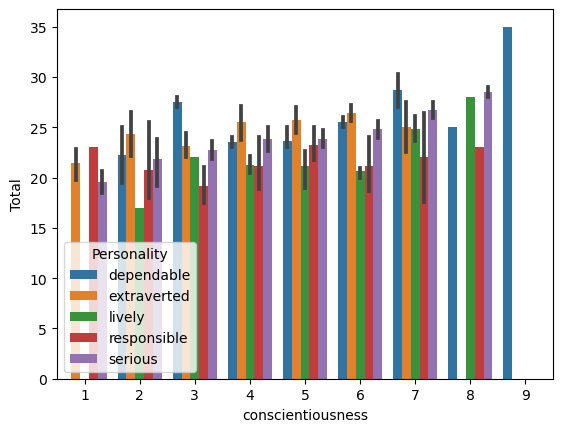

In [225]:
sns.barplot(x="conscientiousness",y="Total",hue="Personality",data=dataV)
plt.show()

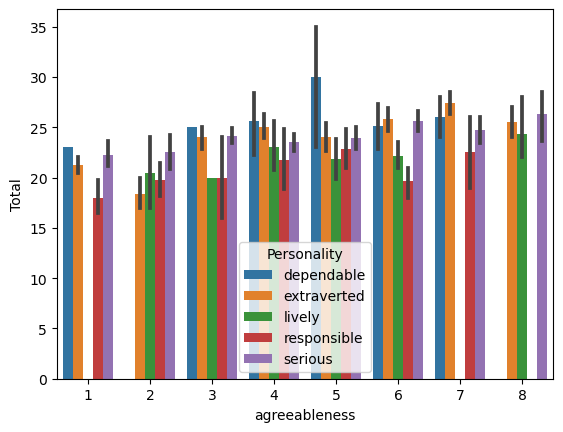

In [226]:
sns.barplot(x="agreeableness",y="Total",hue="Personality",data=dataV)
plt.show()

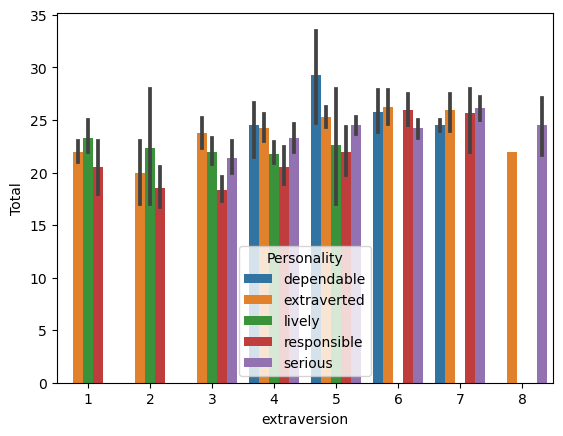

In [227]:
sns.barplot(x="extraversion",y="Total",hue="Personality",data=dataV)
plt.show()

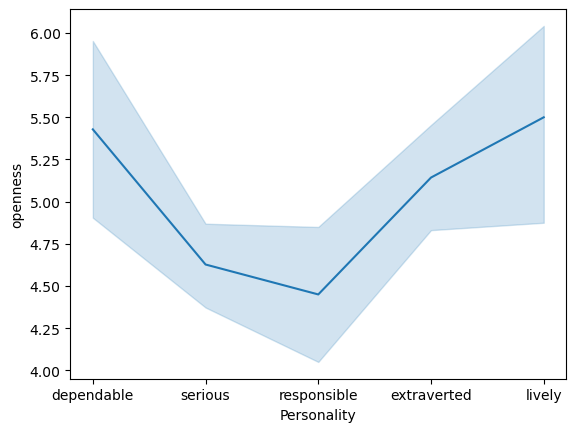

In [228]:
sns.lineplot(x="Personality",y="openness",data=data)
plt.show()

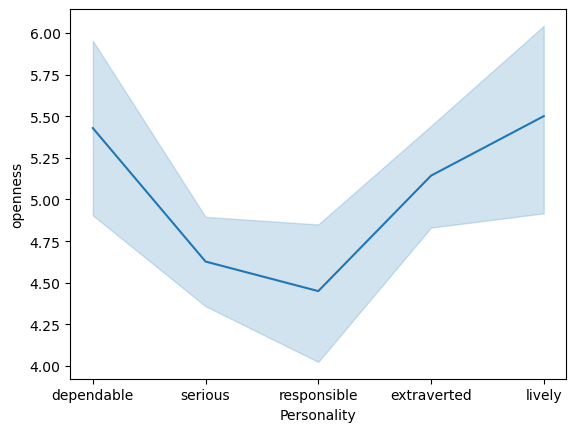

In [229]:
sns.lineplot(x="Personality",y="openness",data=data)
plt.show()

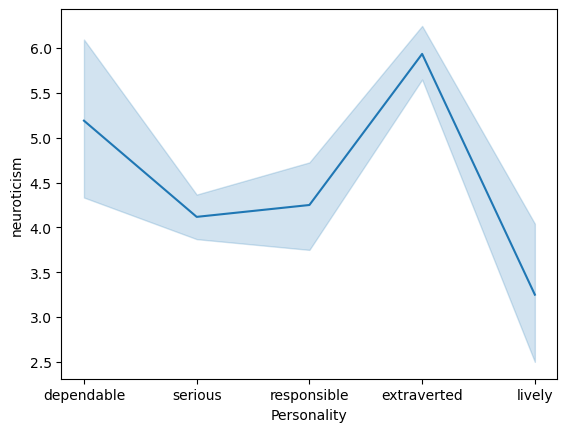

In [230]:
sns.lineplot(x="Personality",y="neuroticism",data=data)
plt.show()

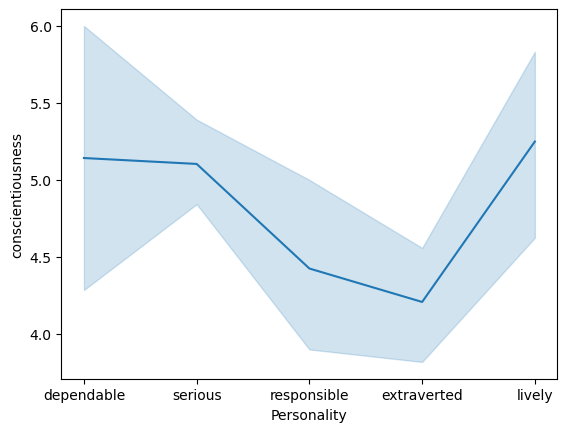

In [231]:
sns.lineplot(x="Personality",y="conscientiousness",data=data)
plt.show()

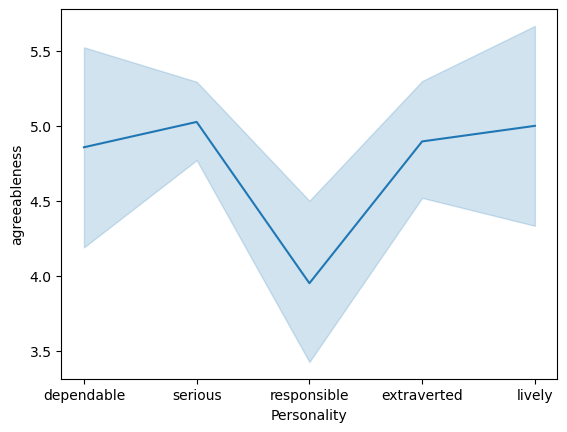

In [232]:
sns.lineplot(x="Personality",y="agreeableness",data=data)
plt.show()

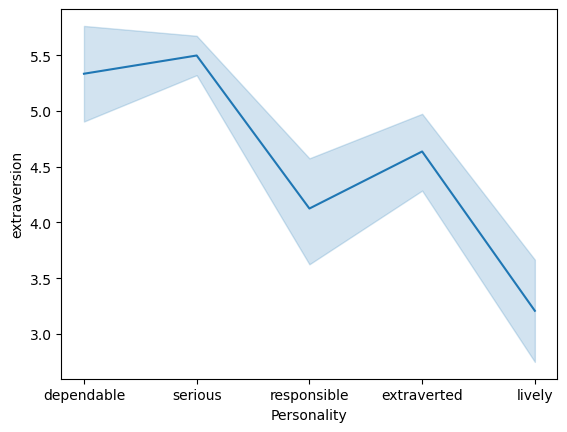

In [233]:
sns.lineplot(x="Personality",y="extraversion",data=data)
plt.show()

# CORRELATION VISUALIZATION :

In [234]:
features = ["openness","neuroticism","conscientiousness","agreeableness","extraversion"]

In [235]:
corrPearson = data[features].corr(method="pearson")
corrSpearman = data[features].corr(method="spearman")

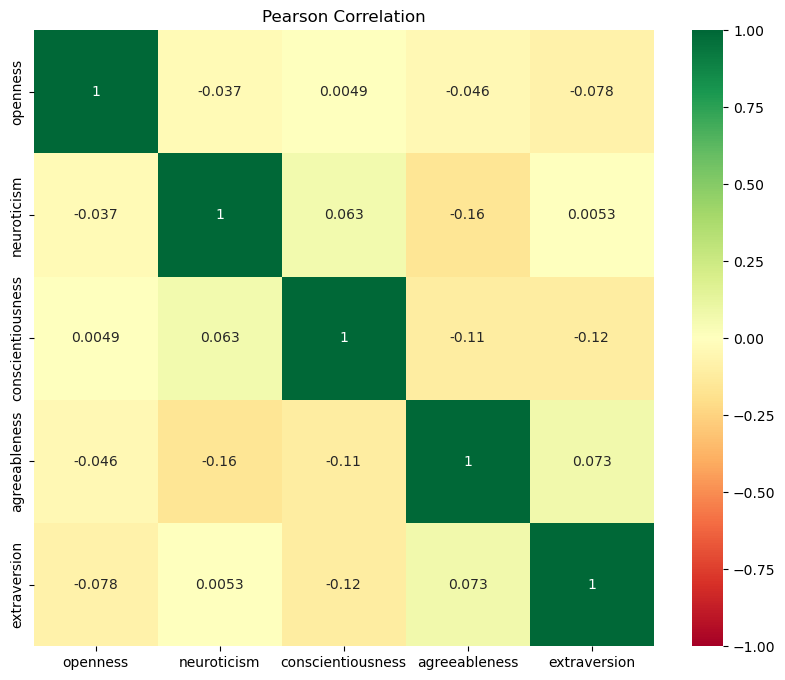

In [236]:
fig = plt.figure(figsize=(10,8))
sns.heatmap(corrPearson,annot=True,cmap='RdYlGn', vmin=-1, vmax=+1)

plt.title("Pearson Correlation")
plt.show()

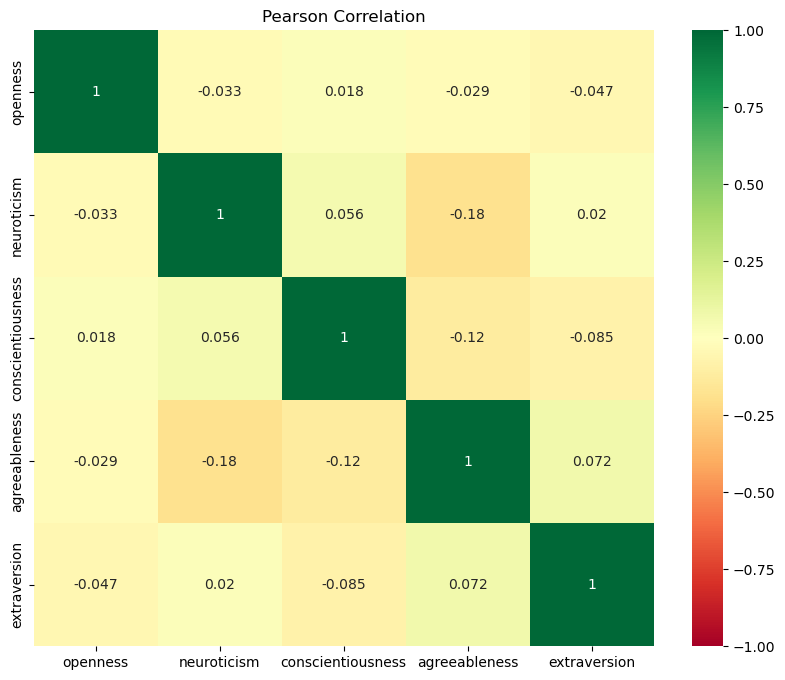

In [237]:
fig = plt.figure(figsize=(10,8))
sns.heatmap(corrSpearman,annot=True,cmap='RdYlGn', vmin=-1, vmax=+1)

plt.title("Pearson Correlation")
plt.show()

# NORMALITY

In [238]:
for i in features:
    print(i,"----------")
    print(shapiro(data[i]))

openness ----------
ShapiroResult(statistic=0.9278994798660278, pvalue=3.301644721509511e-11)
neuroticism ----------
ShapiroResult(statistic=0.9523547887802124, pvalue=1.3906847229350205e-08)
conscientiousness ----------
ShapiroResult(statistic=0.938087522983551, pvalue=3.393595404688199e-10)
agreeableness ----------
ShapiroResult(statistic=0.9465899467468262, pvalue=2.8830664522416782e-09)
extraversion ----------
ShapiroResult(statistic=0.9462627172470093, pvalue=2.645123009514805e-09)


# HOMOGENEITY

In [239]:
print(levene(data["openness"],data["neuroticism"],data["conscientiousness"],
             data["agreeableness"],data["extraversion"]))

LeveneResult(statistic=6.874371499889138, pvalue=1.7474835327816553e-05)


# CONVERSION

In [240]:
encode = LabelEncoder()

In [241]:
columns = ["gender","Personality"]
for i in columns:
    print(data[i].value_counts())
    print("----"*30)
    data[i] = encode.fit_transform(data[i])
    print(data[i].value_counts())
    print("----"*30)

gender
Male      159
Female    156
Name: count, dtype: int64
------------------------------------------------------------------------------------------------------------------------
gender
1    159
0    156
Name: count, dtype: int64
------------------------------------------------------------------------------------------------------------------------
Personality
serious        153
extraverted     77
responsible     40
lively          24
dependable      21
Name: count, dtype: int64
------------------------------------------------------------------------------------------------------------------------
Personality
4    153
1     77
3     40
2     24
0     21
Name: count, dtype: int64
------------------------------------------------------------------------------------------------------------------------


# Personality

* Dependable - 0
* Extraverted - 1
* Lively - 2
* Responsible - 3
* Serious - 4

# Gender

* Female - 0
* Male - 1

In [242]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315 entries, 0 to 314
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   gender             315 non-null    int32
 1   age                315 non-null    int64
 2   openness           315 non-null    int64
 3   neuroticism        315 non-null    int64
 4   conscientiousness  315 non-null    int64
 5   agreeableness      315 non-null    int64
 6   extraversion       315 non-null    int64
 7   Personality        315 non-null    int32
 8   Total              315 non-null    int64
dtypes: int32(2), int64(7)
memory usage: 19.8 KB


# Outlayers Detection:

In [243]:
from scipy import stats
z_scores = stats.zscore(data['openness'])
z_score_outliers = (z_scores < -3) | (z_scores > 3)
z_score_outlier_rows = data[z_score_outliers]
print("Outliers Detected by Z-Score:")
print(z_score_outlier_rows)
threshold = 3
dno1 = data[(z_scores < threshold) & (z_scores > -threshold)]

Outliers Detected by Z-Score:
Empty DataFrame
Columns: [gender, age, openness, neuroticism, conscientiousness, agreeableness, extraversion, Personality, Total]
Index: []


In [244]:
from scipy import stats
z_scores = stats.zscore(dno1['neuroticism'])
z_score_outliers = (z_scores < -3) | (z_scores > 3)
z_score_outlier_rows = dno1[z_score_outliers]
print("Outliers Detected by Z-Score:")
print(z_score_outlier_rows)
threshold = 3
dno2 = dno1[(z_scores < threshold) & (z_scores > -threshold)]

Outliers Detected by Z-Score:
Empty DataFrame
Columns: [gender, age, openness, neuroticism, conscientiousness, agreeableness, extraversion, Personality, Total]
Index: []


In [245]:
from scipy import stats
z_scores = stats.zscore(dno2['conscientiousness'])
z_score_outliers = (z_scores < -3) | (z_scores > 3)
z_score_outlier_rows = dno2[z_score_outliers]
print("Outliers Detected by Z-Score:")
print(z_score_outlier_rows)
threshold = 3
dno3 = dno2[(z_scores < threshold) & (z_scores > -threshold)]

Outliers Detected by Z-Score:
Empty DataFrame
Columns: [gender, age, openness, neuroticism, conscientiousness, agreeableness, extraversion, Personality, Total]
Index: []


In [246]:
from scipy import stats
z_scores = stats.zscore(dno3['agreeableness'])
z_score_outliers = (z_scores < -3) | (z_scores > 3)
z_score_outlier_rows = dno3[z_score_outliers]
print("Outliers Detected by Z-Score:")
print(z_score_outlier_rows)
threshold = 3
dno4 = dno3[(z_scores < threshold) & (z_scores > -threshold)]

Outliers Detected by Z-Score:
Empty DataFrame
Columns: [gender, age, openness, neuroticism, conscientiousness, agreeableness, extraversion, Personality, Total]
Index: []


In [247]:
from scipy import stats
z_scores = stats.zscore(dno4['extraversion'])
z_score_outliers = (z_scores < -3) | (z_scores > 3)
z_score_outlier_rows = dno4[z_score_outliers]
print("Outliers Detected by Z-Score:")
print(z_score_outlier_rows)
threshold = 3
data_no_outlier = dno4[(z_scores < threshold) & (z_scores > -threshold)]

Outliers Detected by Z-Score:
Empty DataFrame
Columns: [gender, age, openness, neuroticism, conscientiousness, agreeableness, extraversion, Personality, Total]
Index: []


In [248]:
data_no_outlier

,gender,age,openness,neuroticism,conscientiousness,agreeableness,extraversion,Personality,Total
0,0,20,7,9,9,5,5,0,35
1,1,17,5,4,5,2,4,4,20
2,0,25,5,5,7,2,4,4,23
3,0,18,6,2,7,4,7,4,26
4,0,19,2,4,7,1,3,3,17
...,...,...,...,...,...,...,...,...,...
310,0,19,6,5,6,4,3,1,24
311,1,18,2,5,8,3,7,0,25
312,1,18,7,5,6,2,7,4,27
313,1,23,6,7,5,4,3,1,25


# Logistic Regression :

In [251]:
input_cols = ['gender', 'age', 'openness', 'neuroticism', 'conscientiousness', 'agreeableness', 'extraversion']
output_cols = ['Personality']

In [252]:
scaler = StandardScaler()
data_no_outlier[input_cols] = scaler.fit_transform(data_no_outlier[input_cols])

In [253]:
X = data_no_outlier[input_cols]
Y = data_no_outlier[output_cols]

In [280]:
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size=0.2, random_state=250)

In [289]:
lr = LogisticRegression(multi_class='auto', solver='saga',max_iter =1000)

In [290]:
lr.fit(X, Y)

LogisticRegression(max_iter=1000, solver='saga')

In [291]:
ypred= lr.predict(xTest)

# Accuracy Score

In [292]:
acc= accuracy_score(yTest,ypred)
print("Accuracy Score: ",acc)

Accuracy Score:  0.8253968253968254


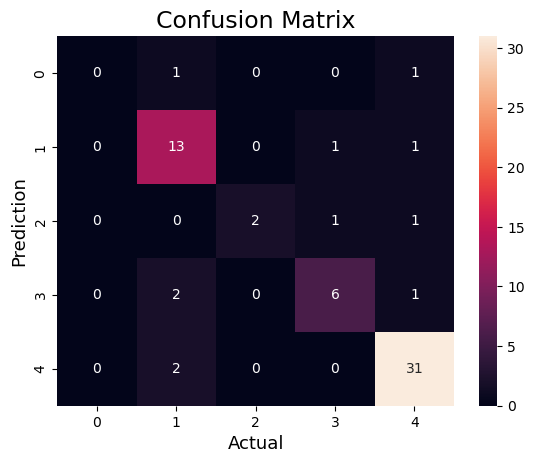

In [293]:
cm = confusion_matrix(yTest,ypred)
sns.heatmap(cm,
            annot=True,
            fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [294]:
precision = precision_score(yTest, ypred,average='micro')*100
print('Precision: %f' % precision)

recall = recall_score(yTest, ypred,average='micro')*100
print('Recall: %f' % recall)

f1 = f1_score(yTest, ypred,average='micro')*100
print('F1 score: %f' % f1)

Precision: 82.539683
Recall: 82.539683
F1 score: 82.539683


In [295]:
print(classification_report(yTest, ypred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.72      0.87      0.79        15
           2       1.00      0.50      0.67         4
           3       0.75      0.67      0.71         9
           4       0.89      0.94      0.91        33

    accuracy                           0.83        63
   macro avg       0.67      0.59      0.61        63
weighted avg       0.81      0.83      0.81        63



In [296]:
acc= accuracy_score(yTest,ypred)
print("Accuracy Score: ",acc)

Accuracy Score:  0.8253968253968254
